In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('data/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# creating data with timesteps
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

## Building the LSTM

In [6]:
# for initializing the neural net
from keras.models import Sequential

# for adding a densely connected network layer
from keras.layers import Dense

# for adding the Long Short-Term Memory layer
from keras.layers import LSTM

# for adding dropout layers that prevent overfitting
from keras.layers import Dropout

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam', loss='mean_squared_error')

regressor.fit(X_train,y_train, epochs = 100, batch_size=32)

Epoch 1/100
62/62 [==============================] - 8s 45ms/step - loss: 0.0418
Epoch 2/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0370
Epoch 3/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0368
Epoch 4/100
62/62 [==============================] - 3s 45ms/step - loss: 0.0366
Epoch 5/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0365
Epoch 6/100
62/62 [==============================] - 3s 51ms/step - loss: 0.0363
Epoch 7/100
62/62 [==============================] - 3s 45ms/step - loss: 0.0363
Epoch 8/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0361
Epoch 9/100
62/62 [==============================] - 3s 47ms/step - loss: 0.0362
Epoch 10/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0361
Epoch 11/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0361
Epoch 12/100
62/62 [==============================] - 3s 46ms/step - loss: 0.0361
Epoch 13/100
62/62 [=====

In [17]:
dataset_test = pd.read_csv('data/tata-test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

TO predict future prices, we must do a couple things:
    1. Merge the training and test set on the 0 axis
    2. Set time step to 60.
    3. Use MinMaxScaler to transform the new data
    4. Reshape the dataset as done previously

In [31]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

mf = lambda xs: [sc.inverse_transform(x) for x in xs]
predicted_stock_price = mf(predicted_stock_price)

In [32]:
predicted_stock_price

[array([[147.52725],
        [145.03494],
        [145.13113],
        [144.90611],
        [144.77371],
        [144.65465],
        [144.54552],
        [144.45935],
        [144.3739 ],
        [144.31807],
        [144.29027],
        [144.28694],
        [144.30478],
        [144.30011],
        [144.27725],
        [144.2663 ],
        [144.27246],
        [144.2647 ],
        [144.25873],
        [144.26376],
        [144.27687],
        [144.29941],
        [144.33766],
        [144.36372],
        [144.38354],
        [144.36426],
        [144.33478],
        [144.30289],
        [144.29185],
        [144.26761],
        [144.20982],
        [144.17305],
        [144.15057],
        [144.13132],
        [144.10036],
        [144.0944 ],
        [144.0591 ],
        [144.01085],
        [143.95444],
        [143.91103],
        [143.89511],
        [143.9224 ],
        [143.93277],
        [143.93504],
        [143.94017],
        [143.93735],
        [143.92616],
        [143.

ValueError: x and y can be no greater than 2D, but have shapes (16,) and (16, 60, 1)

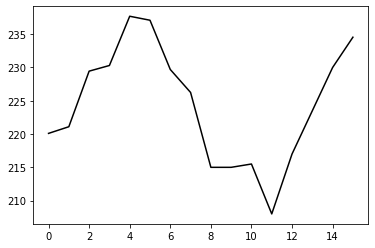

In [33]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()